In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
df = pd.read_csv(r"C:\Users\thesp\OneDrive\Desktop\datafile.csv")

In [79]:
# Convert DataValue to numeric
df['DataValue'] = pd.to_numeric(df['DataValue'], errors='coerce')

# Drop rows with missing values if needed
df = df.dropna(subset=['DataValue'])

# Save to CSV
df.to_csv("cleaned_file.csv", index=False)

In [81]:
# Pivot the data
pivoted_df = df.pivot_table(
    index=['TimePeriod', 'Indicator', 'Subgroup'],  # or just 'TimePeriod' if needed
    values='DataValue',
    aggfunc='mean'  # or sum, if more appropriate
)

# Reset index to make it a flat table
pivoted_df = pivoted_df.reset_index()

# Save to a new CSV file
pivoted_df.to_csv("pivoted_file.csv", index=False)

print("✅ Pivoted file saved as 'pivoted_file.csv'")


✅ Pivoted file saved as 'pivoted_file.csv'


In [122]:
pivoted = pd.read_csv(r"C:\Users\thesp\OneDrive\Desktop\pivoted_file.csv")
pivoted = pivoted.fillna(0)

In [124]:
print(df.columns)

Index(['TimePeriod', 'Indicator', 'Subgroup', 'DataValue'], dtype='object')


In [126]:
# Fill NaNs (you can use mean or 0 depending on data)
pivoted = pivoted.fillna(0)

# Features and Target (e.g., predicting 'Urban' values as an example)
X = pivoted.drop(columns=['DataValue'])  # You can choose any subgroup
y = pivoted['DataValue']


In [128]:
print(pivoted.dtypes)

TimePeriod     object
Indicator      object
Subgroup       object
DataValue     float64
dtype: object


In [131]:
import pandas as pd

# Load your file (adjust path if needed)
pivoted = pd.read_csv("pivoted_file.csv")

# One-hot encode again
pivoted_encoded = pd.get_dummies(pivoted, columns=['TimePeriod', 'Indicator', 'Subgroup'], drop_first=True)

# Check again
print(pivoted_encoded.dtypes)


DataValue                                                         float64
TimePeriod_2011-12                                                   bool
TimePeriod_2013                                                      bool
TimePeriod_2013-15                                                   bool
TimePeriod_2014                                                      bool
                                                                   ...   
Subgroup_Urban Male                                                  bool
Subgroup_Violence against women                                      bool
Subgroup_Voting Rights (Out of 11 international organizations)       bool
Subgroup_Wheat                                                       bool
Subgroup_Women(15-49 yrs)                                            bool
Length: 422, dtype: object


In [133]:
# Load the pivoted file
pivoted = pd.read_csv("pivoted_file.csv")

# One-hot encode categorical features
pivoted_encoded = pd.get_dummies(pivoted, columns=['TimePeriod', 'Indicator', 'Subgroup'], drop_first=True)

# Forcefully convert all columns to numeric, coercing errors to NaN
pivoted_encoded = pivoted_encoded.apply(pd.to_numeric, errors='coerce')

# Drop any rows with NaN (optional: or fill them with 0 or mean)
pivoted_encoded = pivoted_encoded.dropna()


In [135]:
print(df.columns[df.dtypes == 'object'])

Index(['TimePeriod', 'Indicator', 'Subgroup'], dtype='object')


In [141]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Step 2: Load CSV
df = pd.read_csv("pivoted_file.csv")

# Step 3: Pivot the data
pivoted = df.pivot_table(index=['TimePeriod', 'Indicator'], columns='Subgroup', values='DataValue')
pivoted = pivoted.fillna(0)  # Fill missing values

# Step 4: Flatten multiindex columns if needed
pivoted.columns.name = None
pivoted.reset_index(inplace=True)

# Step 5: Drop non-numeric columns from features
X = pivoted.drop(columns=['TimePeriod', 'Indicator', 'Urban Female'])  # 'Urban Female' is target
y = pivoted['Urban Female']

# Step 6: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 8: Predictions and evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)


Mean Squared Error: 8.006075688503848e-23


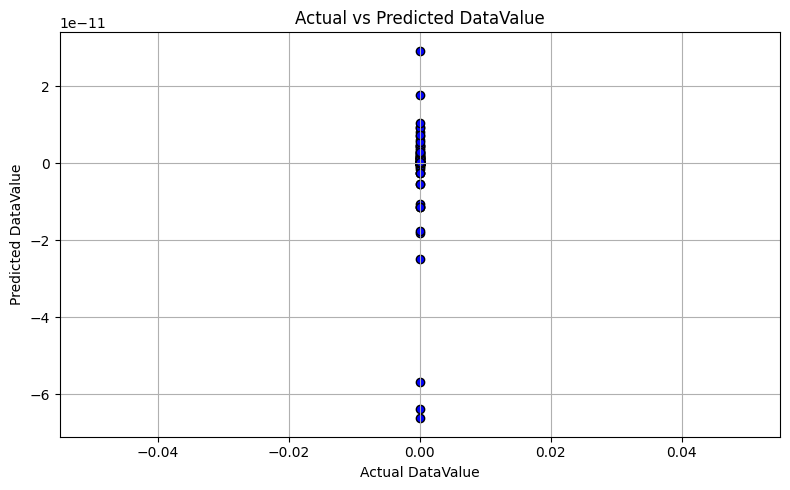

In [143]:
# Scatter plot of actual vs predicted
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # reference line
plt.xlabel('Actual DataValue')
plt.ylabel('Predicted DataValue')
plt.title('Actual vs Predicted DataValue')
plt.grid(True)
plt.tight_layout()
plt.show()
